In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
dataSet = pd.read_csv("Ads_CTR_Optimisation.csv")

In [5]:
N = 10000

number_of_ads = 10

list_of_ad_selected = []
Number_of_times_ad_selected = [0] * number_of_ads
Sum_of_rewards = [0] * number_of_ads

total_reward = 0

for n in range(N):
    ad = 0
    mx_ucb = 0
    for i in range(number_of_ads):
        if (Number_of_times_ad_selected[i] > 0):
            avg_reward = Sum_of_rewards[i] / Number_of_times_ad_selected[i]
            delta = math.sqrt(3/2* math.log(n+1) / Number_of_times_ad_selected[i])
            ucb  = avg_reward + delta
                
            mx_ucb = max(mx_ucb, ucb)
            if (mx_ucb == ucb):
                ad = i
                
        else:
            ad = i
            mx_ucb = 1e400
    
    list_of_ad_selected.append(ad)
    Number_of_times_ad_selected[ad] += 1
    Sum_of_rewards[ad] += dataSet.values[n, ad]
    total_reward += dataSet.values[n, ad]
    



(array([ 880.,  326.,  254.,  368., 6121.,  145.,  307.,  935.,  457.,
         207.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

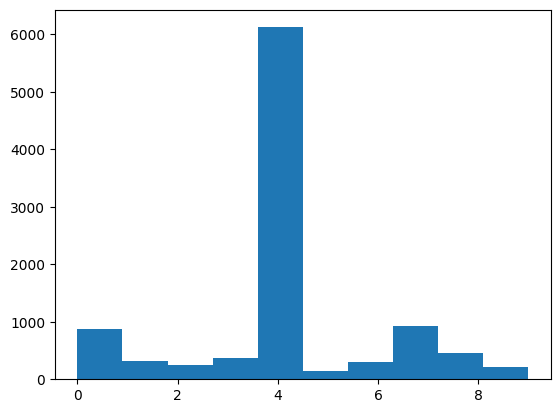

In [6]:
plt.hist(list_of_ad_selected)